# <center> Predictive Model for Miami Housing Prices </center>

<b> Project Overview: </b>

For decades now, the real estate industry has succumbed to the nueasues of the continual falling and rising of housing prices. Due to the opaqueness of the daily differences in asset valuation, many researchers have been interested in one’s ability to accurately predict housing prices via methods of machine learning. The purpose of this project is to explore the possibility to construct a linear regression model that accurately predicts the sale price of homes sold, specifically in the Miami housing market. 

The intention of this study is not only to determine whether a regression model can be constructed to predict the value of real estate property, but to serve as a tool for realtors, home buyers, and other interested parties to approximate the value of a home that is listed for sale, based on similar geographical attributes and characteristics of homes that have previously sold on the market. This study will implement a use-case instance of a multiple linear regression model to analyze the significance of predictor variables and identify those variables that exhibits the most optimal prediction on the real estate value of homes in the Miami area. 

### Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import pylab
import matplotlib.pyplot as plt 
import matplotlib.pylab as plt
import matplotlib
import matplotlib.image as mpimg
from matplotlib import style
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import shapiro

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## <center> Exploratory Data Analysis</center>

<i><center>This portion of the data analysis reflects all preliminary data visualizations along with code blocks demonstrating feature engineering and any data preprocessing steps necessary before model construction.
</i></center>

In [2]:
# read in the csv file of the dataset to be used for analysis
df_housing = pd.read_csv('miami-housing.csv')

In [3]:
# display first five rows of the dataset
df_housing.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
# display last five rows of the dataset
df_housing.tail()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4
13931,25.784387,-80.258901,131320040700,250000.0,8833,1867,266,3793.9,20859.6,3421.0,21928.6,12599.0,474.7,62,0,11,4


In [5]:
# display the shape (# of rows/columns) of the dataset
df_housing.shape

(13932, 17)

In [6]:
# provide summary statistics of the dataset
df_housing.describe(include = 'all')

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [7]:
# show the summary statistics of only the target varable
df_housing['SALE_PRC'].describe()

count    1.393200e+04
mean     3.999419e+05
std      3.172147e+05
min      7.200000e+04
25%      2.350000e+05
50%      3.100000e+05
75%      4.280000e+05
max      2.650000e+06
Name: SALE_PRC, dtype: float64

In [8]:
# use the .info function to check data types of columns
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [9]:
# determine sparsity of dataframe
sparse_check = (df_housing.to_numpy() == 0).mean()
print("The sparsity of this dataframe (as a decimal) is: ", sparse_check)
print("The sparsity of this dataframe (as a percent) is: ", "{:.0%}".format(sparse_check))

The sparsity of this dataframe (as a decimal) is:  0.07230497711573863
The sparsity of this dataframe (as a percent) is:  7%


In [10]:
# check for any duplicated rows within the dataset
duplicated_rows = df_housing[df_housing.duplicated()]
print('The number of duplicated rows are: ', duplicated_rows.shape)

The number of duplicated rows are:  (0, 17)


In [11]:
# check for any null values
df_housing.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [12]:
# remove specific columns using the drop feature
df_housing.drop(['LATITUDE','LONGITUDE','PARCELNO',
                'avno60plus','structure_quality'], axis = 1, inplace = True)

In [13]:
feature = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL',
           'RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST',
           'SUBCNTR_DI','HWY_DIST','age','month_sold']

features = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL',
           'RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST',
           'SUBCNTR_DI','HWY_DIST','age']

### <center> Exploratory Data Analysis - Frequency Distribution </center>

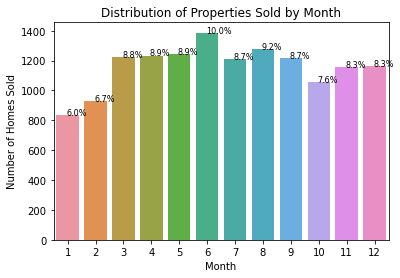

In [14]:
# show distribution of discrete explanatory varaible 'month_sold'
ax = sns.countplot(x = 'month_sold', data = df_housing)
plt.figsize=(25,25)
plt.title('Distribution of Properties Sold by Month')
plt.xlabel("Month")
plt.ylabel("Number of Homes Sold")

total = len(df_housing['month_sold'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 8)

plt.show()

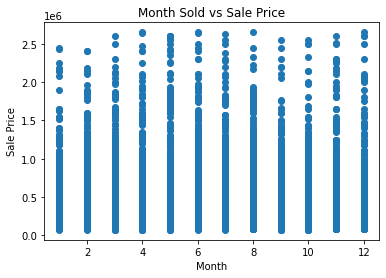

In [15]:
# show relationship between target variable and month sold
plt.scatter(df_housing['month_sold'], df_housing['SALE_PRC'])
plt.figsize=(25,25)
plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.title('Month Sold vs Sale Price')
plt.show()

In [16]:
# remove month_sold feature
df_housing.drop(['month_sold'], axis = 1, inplace = True)

# display updated shape of dataframe
df_housing.shape

(13932, 11)

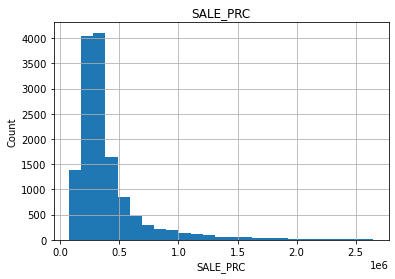

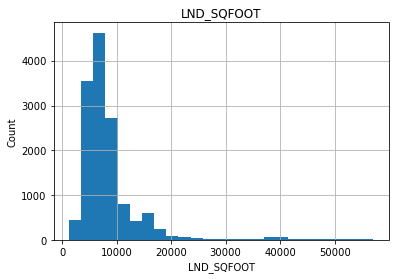

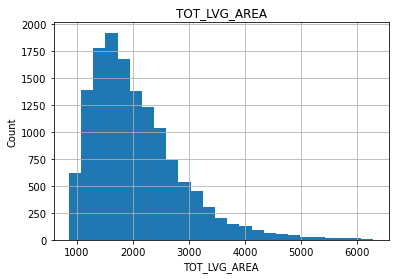

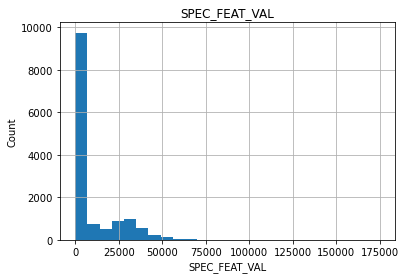

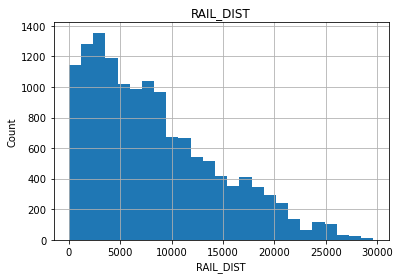

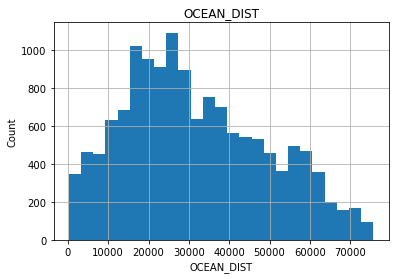

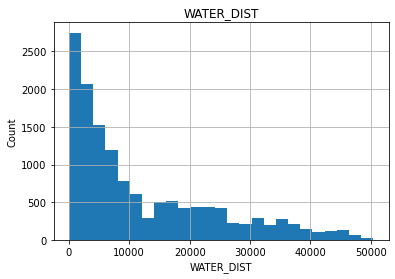

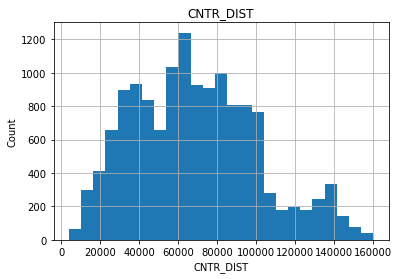

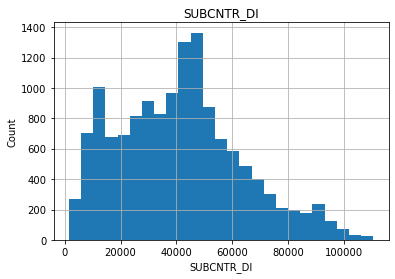

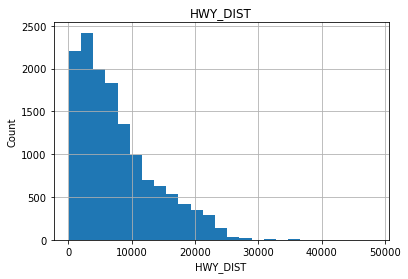

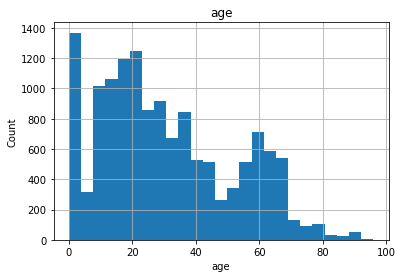

In [17]:
# show distribution of continuous explanatory varaibles
for i in features:
    data = df_housing
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

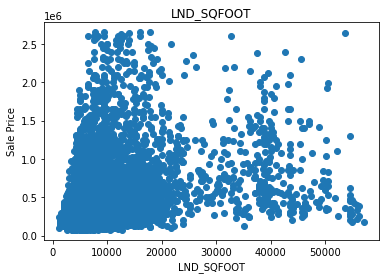

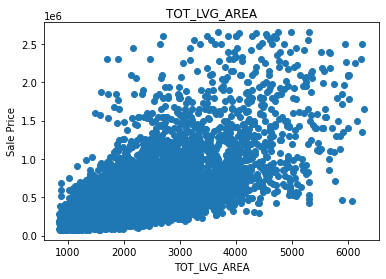

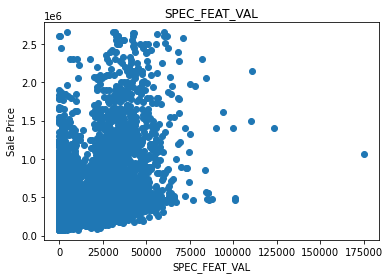

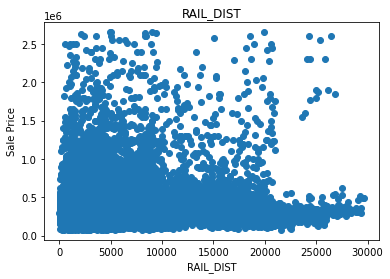

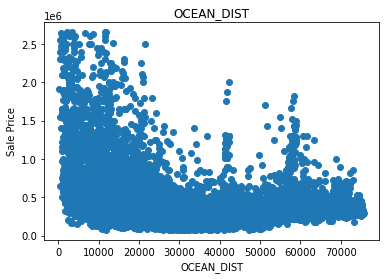

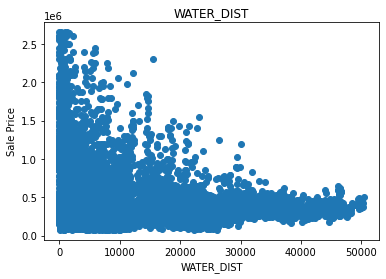

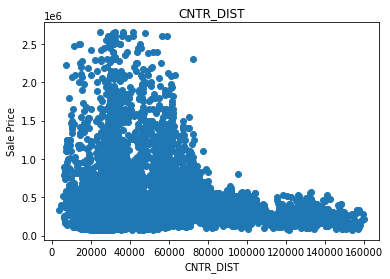

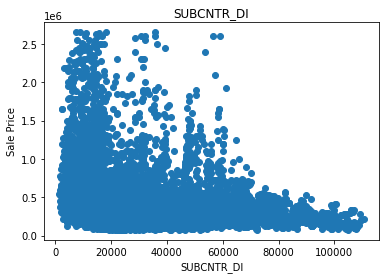

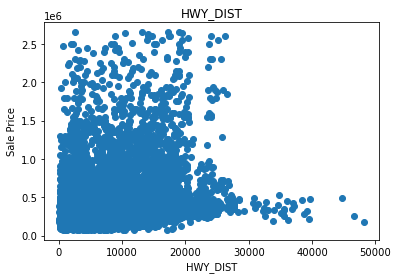

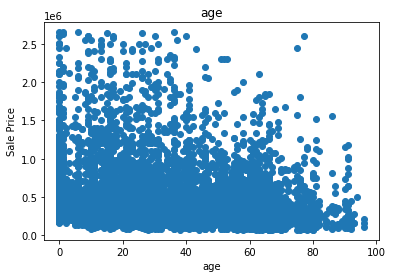

In [18]:
# show correlations between exploratory and explanatory varaibles

for i in features:
    if i !='SALE_PRC':
        data[i] = data[i]
        plt.scatter(data[i], data['SALE_PRC'])
        plt.xlabel(i)
        plt.ylabel('Sale Price')
        plt.title(i)
        plt.show()

### <center> Exploratory Data Analysis - Outliers </center>

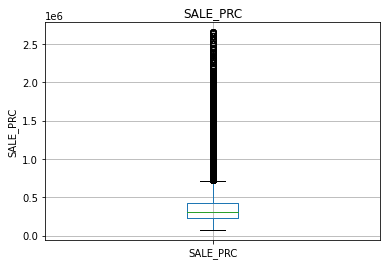

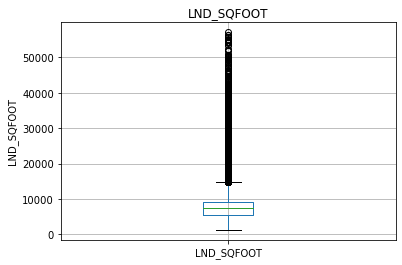

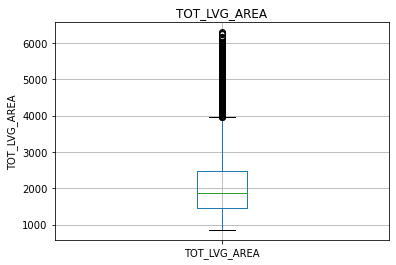

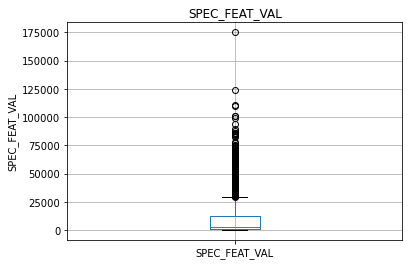

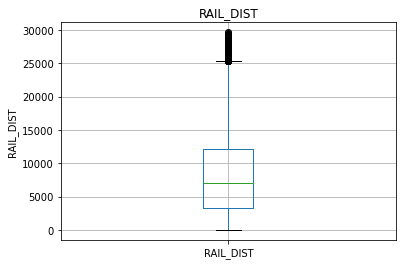

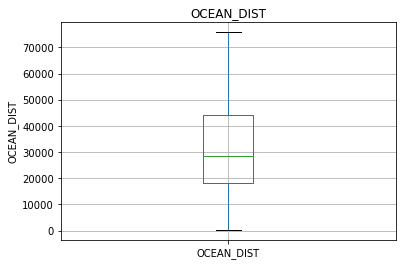

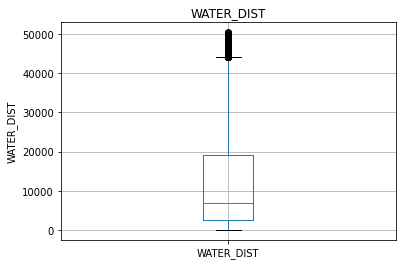

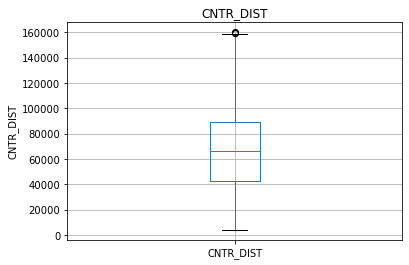

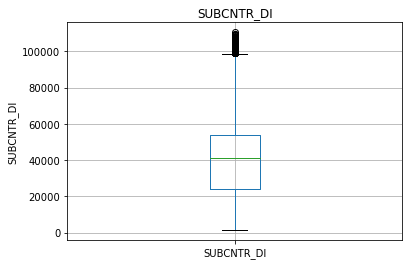

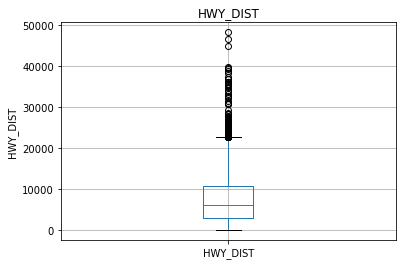

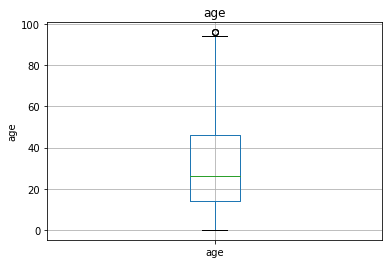

In [19]:
# create a boxplots to detect outliers
for i in features:
    data = df_housing
    data.boxplot(column = i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [20]:
# handle outliers using z-score method
z = np.abs(stats.zscore(df_housing))

# keep rows with all z-scores less than |3|
outliers = df_housing[(z<3).all(axis=1)]

# set housing dataframe equal to the outliers variable
df_housing = outliers

# retrun the updated shape of dataframe
df_housing.shape

(13044, 11)

### <center> Feature Transformations </center>

Text(0.5, 1.0, 'Log-Transformed Data')

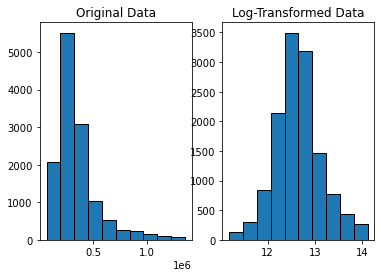

In [21]:
# transform the dependant variable by taking the log
data_log = np.log(df_housing['SALE_PRC'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df_housing['SALE_PRC'], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [22]:
# update dataset feature with new transformed data
df_housing['SALE_PRC'] = data_log

# display updated shape of dataframe
df_housing.shape

(13044, 11)

In [23]:
# normalize features using mean normalization
normalized_df = (df_housing - df_housing.mean()) / (df_housing.std())

# set housing dataframe equal to normalized dataframe
df_housing = normalized_df

# display shape of normalized dataframe
df_housing.shape

(13044, 11)

None of the variables observed are normally distributed 

## <center> Predictive Model Construction - Linear Regression </center>

<b> Purpose of this data analysis: </b>

The goal of this data analysis is to utilize logistic regression methods - a familiar classification algorithm - to determine the rehospitalization status of diabetic patients. Ultimately, analysts would like to gain insight on the possibility of predicting readmission status using attributes reported during said patient's initial encounter at a medical facility.

The purpose of this study spans beyond the scope of the possibility of constructing regression models to predict the value of real estate assets. The intention were to also provide a practical tool for realtors, home buyers, and other interested parties who seek to approximate the value of a home that is listed for sale, based on similar geographical attributes and characteristics of homes using historical data. 

<b> Why linear regression? </b>

This study implemented a use-case instance of a multiple linear regression model analyzing the significance of predictor variables while identifying those variables that exhibited the most optimal prediction of the real estate value of homes sitting on the market awaiting to be sold. This regression analysis “offers a robust model for using historical data of a specific area, providing a more enhanced guidance on property valuations” (Barr, 2018).


<b> Assumptions of a logistic regression model: </b>
- There is a linear relationship between dependent and independent variable(s).
- Normally distributed residuals
- There is an absence or little evidence of multicollinearity
- Presence of homoscedasticity amongst the residuals
- There is no autocorrelation of the residuals.

### Initial Regression Model

In [24]:
# define our input variable (X) & output variable
X = df_housing.drop('SALE_PRC', axis = 1)
Y = df_housing[['SALE_PRC']]

# split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a linear regression model object
regression_model1 = LinearRegression()

# pass through the X_train & y_train data set
regression_model1.fit(X_train, y_train)

LinearRegression()

In [25]:
# define our input
X2 = sm.add_constant(X)

# create a OLS model
model1 = sm.OLS(Y, X2)

# fit the data
est1 = model1.fit()

# print out a summary
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2577.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:17:33   Log-Likelihood:                -11392.
No. Observations:               13044   AIC:                         2.281e+04
Df Residuals:                   13033   BIC:                         2.289e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.504e-13      0.005   1.08e-10

### <center> Assumption Test - Multicollinearity </center>

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age
SALE_PRC,1.000000,0.330581,0.653875,0.422055,-0.082726,-0.126170,0.034539,-0.186769,-0.367639,0.305013,-0.197933
LND_SQFOOT,0.330581,1.000000,0.327929,0.378259,-0.105308,-0.238989,-0.137251,-0.092130,-0.202861,0.061667,0.190015
TOT_LVG_AREA,0.653875,0.327929,1.000000,0.396191,0.118479,0.032940,0.230602,0.234819,0.058851,0.224749,-0.372819
SPEC_FEAT_VAL,0.422055,0.378259,0.396191,1.000000,-0.023585,-0.006967,0.043561,-0.020781,-0.114765,0.143237,-0.057385
RAIL_DIST,-0.082726,-0.105308,0.118479,-0.023585,1.000000,0.260243,0.190779,0.469516,0.498498,-0.109180,-0.250309
OCEAN_DIST,-0.126170,-0.238989,0.032940,-0.006967,0.260243,1.000000,0.482587,0.206902,0.386768,0.119111,-0.162605
WATER_DIST,0.034539,-0.137251,0.230602,0.043561,0.190779,0.482587,1.000000,0.517422,0.178435,0.423912,-0.341848
CNTR_DIST,-0.186769,-0.092130,0.234819,-0.020781,0.469516,0.206902,0.517422,1.000000,0.763142,0.058580,-0.573633
SUBCNTR_DI,-0.367639,-0.202861,0.058851,-0.114765,0.498498,0.386768,0.178435,0.763142,1.000000,-0.124514,-0.408541
HWY_DIST,0.305013,0.061667,0.224749,0.143237,-0.109180,0.119111,0.423912,0.058580,-0.124514,1.000000,-0.114922


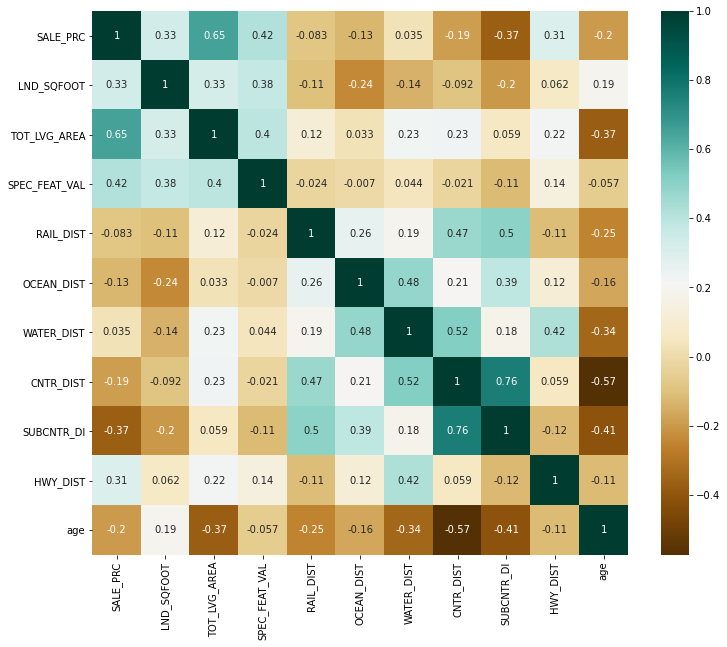

In [26]:
# calculate the correlation matrix
corr = df_housing.corr()
f, ax = plt.subplots(figsize = (12, 10))

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            cmap = 'BrBG',
            annot = True)
plt.yticks(rotation = 0)
plt.show()

In [27]:
# test for multicollinearity using VIF 
# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X_1 = sm.tools.add_constant(df_housing)

# create the series 
series_initial = pd.Series([variance_inflation_factor(X_1.values, i) 
                            for i in range(X_1.shape[1])], index=X_1.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_initial)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const            1.000000
SALE_PRC         2.977343
LND_SQFOOT       1.522872
TOT_LVG_AREA     2.501293
SPEC_FEAT_VAL    1.358931
RAIL_DIST        1.443906
OCEAN_DIST       2.359340
WATER_DIST       3.646969
CNTR_DIST        7.016994
SUBCNTR_DI       5.617761
HWY_DIST         1.434155
age              2.004165
dtype: float64

#### Feature Selection 1st iteration 

In [28]:
# recalculate for multicollinearity after dropping CNTR_DIST feature
# define new data frame from removed column 
df_reduced = df_housing.drop(['CNTR_DIST'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X_2 = sm.tools.add_constant(df_reduced)

# create the series 
series_after = pd.Series([variance_inflation_factor(X_2.values, i)
                          for i in range(X_2.shape[1])], index=X_2.columns)

# compare previous test check with new test
# display the series
print('DATA BEFORE')
print('-'*100)
display(series_initial)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const            1.000000
SALE_PRC         2.977343
LND_SQFOOT       1.522872
TOT_LVG_AREA     2.501293
SPEC_FEAT_VAL    1.358931
RAIL_DIST        1.443906
OCEAN_DIST       2.359340
WATER_DIST       3.646969
CNTR_DIST        7.016994
SUBCNTR_DI       5.617761
HWY_DIST         1.434155
age              2.004165
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const            1.000000
SALE_PRC         2.937379
LND_SQFOOT       1.469688
TOT_LVG_AREA     2.491474
SPEC_FEAT_VAL    1.357733
RAIL_DIST        1.407222
OCEAN_DIST       1.595557
WATER_DIST       1.890571
SUBCNTR_DI       2.417362
HWY_DIST         1.425110
age              1.768773
dtype: float64

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,SUBCNTR_DI,HWY_DIST,age
SALE_PRC,1.000000,0.330581,0.653875,0.422055,-0.082726,-0.126170,0.034539,-0.367639,0.305013,-0.197933
LND_SQFOOT,0.330581,1.000000,0.327929,0.378259,-0.105308,-0.238989,-0.137251,-0.202861,0.061667,0.190015
TOT_LVG_AREA,0.653875,0.327929,1.000000,0.396191,0.118479,0.032940,0.230602,0.058851,0.224749,-0.372819
SPEC_FEAT_VAL,0.422055,0.378259,0.396191,1.000000,-0.023585,-0.006967,0.043561,-0.114765,0.143237,-0.057385
RAIL_DIST,-0.082726,-0.105308,0.118479,-0.023585,1.000000,0.260243,0.190779,0.498498,-0.109180,-0.250309
OCEAN_DIST,-0.126170,-0.238989,0.032940,-0.006967,0.260243,1.000000,0.482587,0.386768,0.119111,-0.162605
WATER_DIST,0.034539,-0.137251,0.230602,0.043561,0.190779,0.482587,1.000000,0.178435,0.423912,-0.341848
SUBCNTR_DI,-0.367639,-0.202861,0.058851,-0.114765,0.498498,0.386768,0.178435,1.000000,-0.124514,-0.408541
HWY_DIST,0.305013,0.061667,0.224749,0.143237,-0.109180,0.119111,0.423912,-0.124514,1.000000,-0.114922
age,-0.197933,0.190015,-0.372819,-0.057385,-0.250309,-0.162605,-0.341848,-0.408541,-0.114922,1.000000


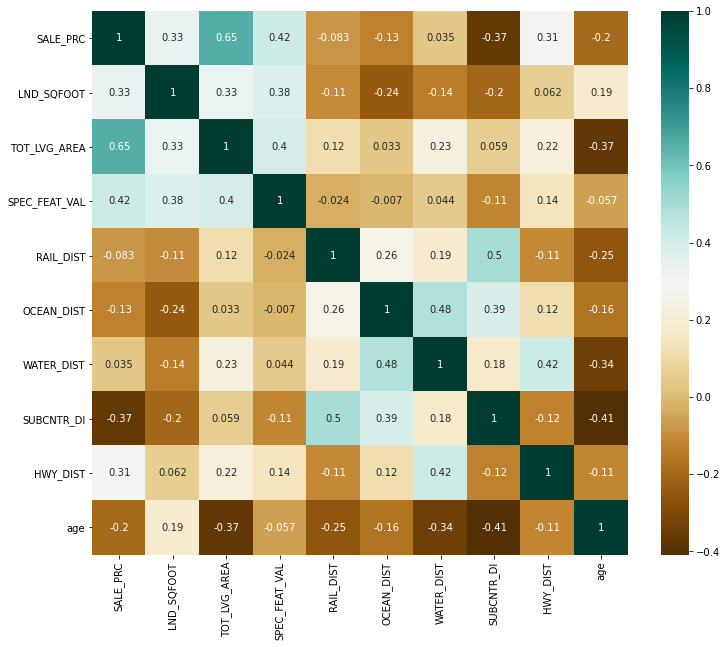

In [29]:
# rerun correlation matrix & heatmap
# calculate the correlation matrix
corr = df_reduced.corr()
f, ax = plt.subplots(figsize = (12, 10))

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            cmap = 'BrBG',
            annot = True)
plt.yticks(rotation = 0)
plt.show()

#### Reduced Model 1st iteration

In [30]:
# define our input variable (X) & output variable
X = df_reduced.drop('SALE_PRC', axis = 1)
Y = df_reduced[['SALE_PRC']]

# split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a linear regression model object
regression_model2 = LinearRegression()

# pass through the X_train & y_train data set
regression_model2.fit(X_train, y_train)

LinearRegression()

In [31]:
# define our input
X3 = sm.add_constant(X)

# create a OLS model
model2 = sm.OLS(Y, X3)

# fit the data
est2 = model2.fit()

# print out a summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2806.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:17:39   Log-Likelihood:                -11481.
No. Observations:               13044   AIC:                         2.298e+04
Df Residuals:                   13034   BIC:                         2.306e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.504e-13      0.005   1.08e-10

In [32]:
df_reduced

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,SUBCNTR_DI,HWY_DIST,age
0,0.715444,0.481944,-0.304914,-0.692698,-0.897841,-1.124431,-0.984326,-0.181168,1.466240,1.692709
1,0.241903,0.481944,-0.361446,-0.692698,-0.645126,-1.250670,-0.985150,-0.199649,1.841217,1.504547
2,1.937269,0.481944,0.473134,3.496829,-0.636316,-1.255006,-0.988572,-0.200192,1.854263,1.410466
3,2.368644,1.380552,0.148823,0.161538,-0.608133,-1.279378,-1.013554,-0.195845,1.908502,1.504547
4,1.818949,1.482832,-0.407563,0.727566,-0.693550,-1.239674,-0.986092,-0.189974,1.802926,0.516693
...,...,...,...,...,...,...,...,...,...,...
13927,-0.245122,-0.276394,-1.474219,-0.132460,-0.729397,-0.671735,-0.740077,-1.358577,-1.132125,-0.706363
13928,0.188508,-0.065988,-0.154660,-0.476095,-0.770485,-0.658668,-0.754767,-1.350907,-1.163089,-0.235957
13929,-0.154274,0.214553,-1.021969,-0.516964,-0.680482,-0.686915,-0.711824,-1.345561,-1.162139,-0.706363
13930,0.032421,-0.065988,-0.513188,-0.425691,-0.706078,-0.673217,-0.711766,-1.344411,-1.182459,-0.706363


In [33]:
features_reduced = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA',
                    'SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST',
                    'WATER_DIST','SUBCNTR_DI','HWY_DIST','age']

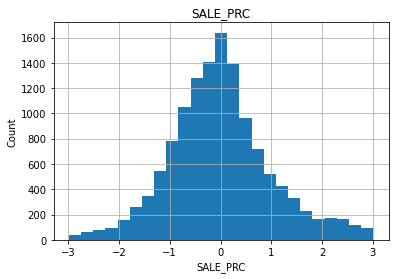

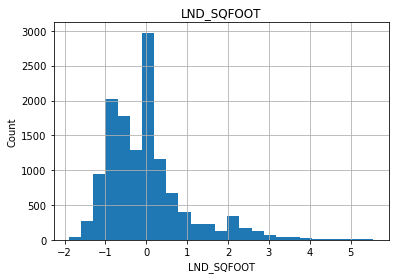

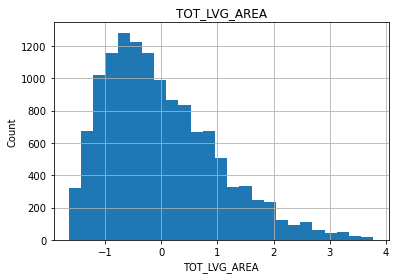

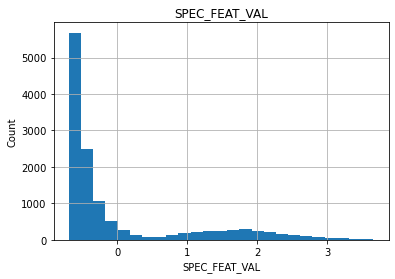

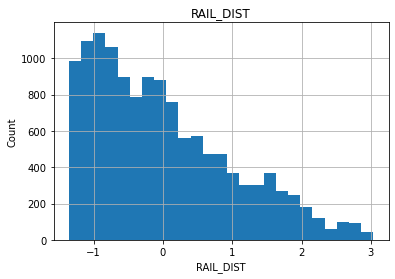

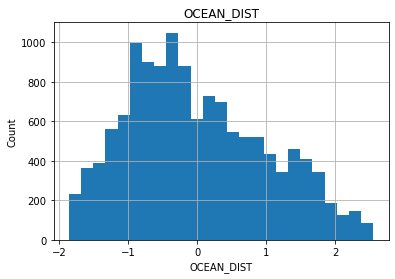

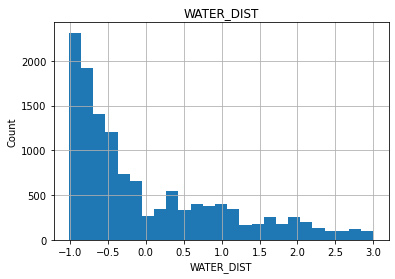

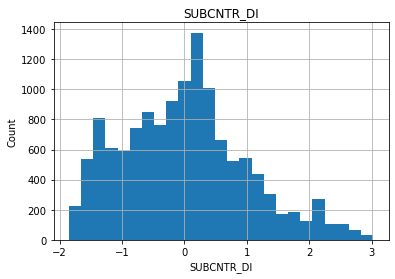

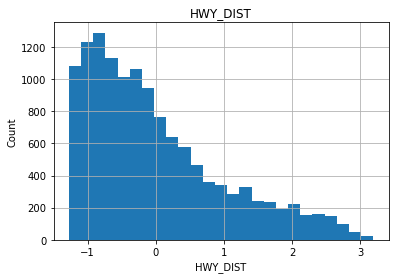

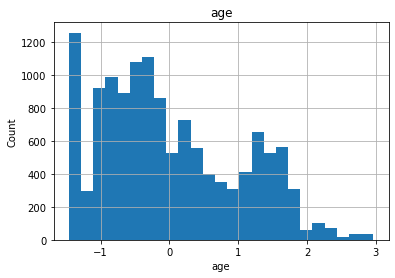

In [34]:
# show distribution of continuous explanatory varaibles
for i in features_reduced:
    data = df_reduced
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

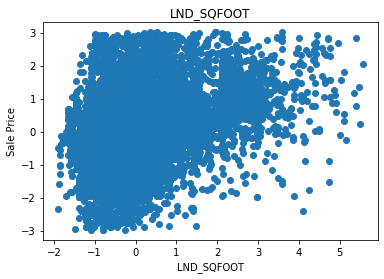

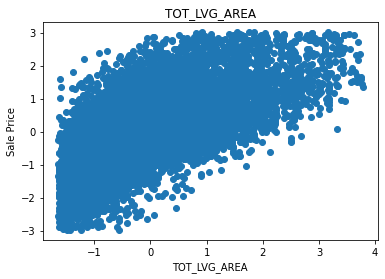

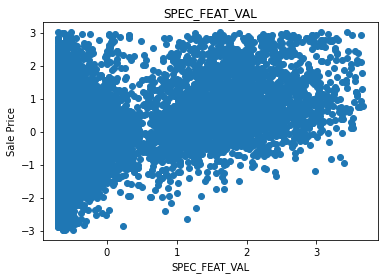

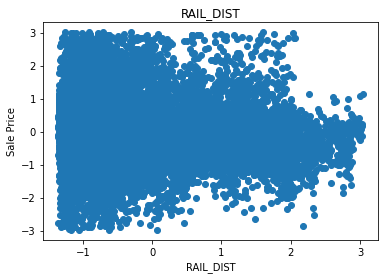

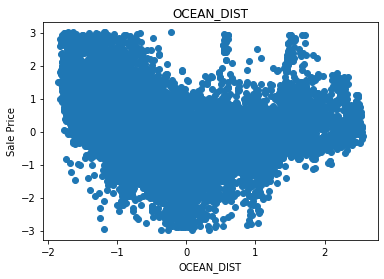

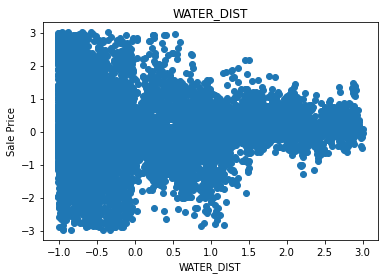

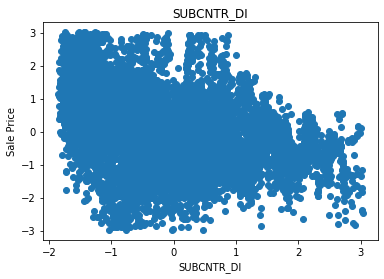

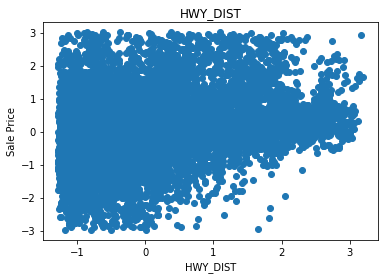

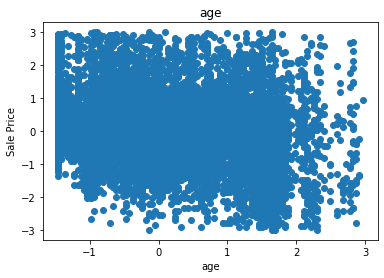

In [35]:
# show correlations between exploratory and explanatory varaibles

for i in features_reduced:
    if i !='SALE_PRC':
        data[i] = data[i]
        plt.scatter(data[i], data['SALE_PRC'])
        plt.xlabel(i)
        plt.ylabel('Sale Price')
        plt.title(i)
        plt.show()

In [36]:
# define new data frame from removed column 
df_reduced2 = df_reduced.drop(['age'], axis = 1)

# define our input variable (X) & output variable
X = df_reduced2.drop('SALE_PRC', axis = 1)
Y = df_reduced2[['SALE_PRC']]

# split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a linear regression model object
regression_model3 = LinearRegression()

# pass through the X_train & y_train data set
regression_model3.fit(X_train, y_train)

LinearRegression()

In [37]:
# define our input
X4 = sm.add_constant(X)

# create a OLS model
model3 = sm.OLS(Y, X4)

# fit the data
est3 = model3.fit()

# print out a summary
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2815.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:17:44   Log-Likelihood:                -11963.
No. Observations:               13044   AIC:                         2.394e+04
Df Residuals:                   13035   BIC:                         2.401e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.504e-13      0.005   1.04e-10

In [38]:
##### get the coefficient of our model and the intercept
intercept = regression_model3.intercept_[0]
coefficent = regression_model3.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model3.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.0004585
----------------------------------------------------------------------------------------------------
The Coefficient for LND_SQFOOT is -0.014
The Coefficient for TOT_LVG_AREA is 0.62
The Coefficient for SPEC_FEAT_VAL is 0.12
The Coefficient for RAIL_DIST is 0.077
The Coefficient for OCEAN_DIST is 0.04
The Coefficient for WATER_DIST is -0.15
The Coefficient for SUBCNTR_DI is -0.4
The Coefficient for HWY_DIST is 0.17


In [39]:
#predictions on test set
predictions = regression_model3.predict(X_test)
#pred_results = pd.DataFrame({'Actual': [y_test], 'Predicted': [predictions]})

# show predictions
predictions[:5]

array([[-0.11329491],
       [ 1.39506205],
       [ 0.0983267 ],
       [ 0.06288406],
       [-1.11352948]])

### <center> Assumption Test - Normality </center>

In [40]:
# perfrom Shapiro-Wilk test to test normality
# H0 (accepted) - the sample is normally distributed (P > 0.05)
# H1 (rejected) - the sample is not normally distributed
shapiro(est2.resid)

ShapiroResult(statistic=0.9797971248626709, pvalue=3.45941915004182e-39)

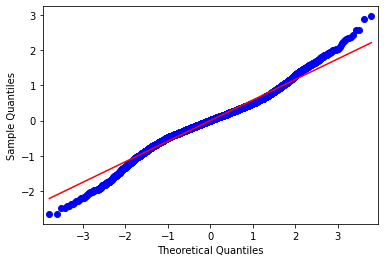

The mean of the residuals is 3.062e-15


In [41]:
# check for the normality of the residuals
sm.qqplot(est2.resid, line='s')
pylab.show()

# check that the mean of the residuals is approx. 0.
mean_residuals = sum(est2.resid)/ len(est2.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are normally distributed

In [42]:
# perfrom Shapiro-Wilk test to test normality
# H0 (accepted) - the sample is normally distributed (P > 0.05)
# H1 (rejected) - the sample is not normally distributed
shapiro(est3.resid)

ShapiroResult(statistic=0.9791504144668579, pvalue=1.1309949970488815e-39)

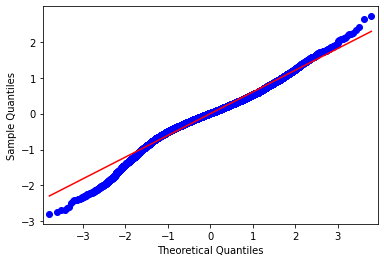

The mean of the residuals is 2.494e-15


In [43]:
# check for the normality of the residuals
sm.qqplot(est3.resid, line='s')
pylab.show()

# check that the mean of the residuals is approx. 0.
mean_residuals = sum(est3.resid)/ len(est3.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### <center> Assumption Test - Homoscedasticity </center>

In [44]:
# create labels for results
labels = ['Lagrange Multiplier Statistic', 'P-Value',
         'f-value', 'f p-value']

# run Bresuch-Pagan test assuming the following hypothesis
# H0: Homoscedasticity is present
# H1: Homoscedasticity is not present (heteroscedasticity exists)
test = diag.het_breuschpagan(est2.resid, est2.model.exog)

# return results of test
lzip(labels, test)

[('Lagrange Multiplier Statistic', 1603.540395421101),
 ('P-Value', 0.0),
 ('f-value', 202.98859618807472),
 ('f p-value', 0.0)]

In [45]:
# create labels for results
labels = ['Lagrange Multiplier Statistic', 'P-Value',
         'f-value', 'f p-value']

# run Bresuch-Pagan test assuming the following hypothesis
# H0: Homoscedasticity is present
# H1: Homoscedasticity is not present (heteroscedasticity exists)
test = diag.het_breuschpagan(est3.resid, est3.model.exog)

# return results of test
lzip(labels, test)

[('Lagrange Multiplier Statistic', 1154.4022062915014),
 ('P-Value', 6.805113207111165e-244),
 ('f-value', 158.20165892167856),
 ('f p-value', 1.657881403471436e-255)]

### <center> Assumption Test - Autocoreelation </center>

Durbin Watson statistic results: 0.668


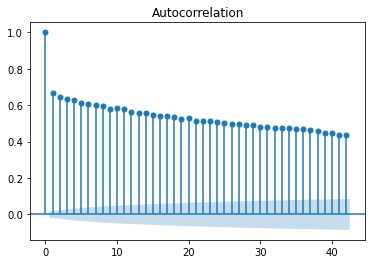

In [46]:
# run Durbin Watson's test to check for autocorrelation
test_results = durbin_watson(est2.resid)
print('Durbin Watson statistic results: {:.4}'.format(test_results))

# plot autocorrelation
sm.graphics.tsa.plot_acf(est2.resid)
plt.show()

Durbin Watson statistic results: 0.8057


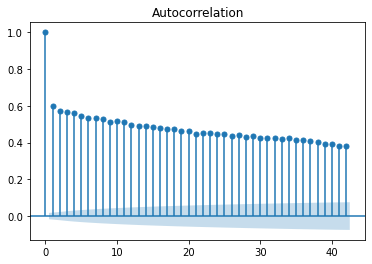

In [47]:
# run Durbin Watson's test to check for autocorrelation
test_results = durbin_watson(est3.resid)
print('Durbin Watson statistic results: {:.4}'.format(test_results))

# plot autocorrelation
sm.graphics.tsa.plot_acf(est3.resid)
plt.show()

### <center> Model Evaluation - Measures of Error </center>

In [48]:
# calculate the mean squared error
model_mse = mean_squared_error(y_test, predictions)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, predictions)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# calulcate the r-squared
model_r2 =  r2_score(y_test, predictions)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))
print("R2: {:.3}".format(model_r2))

MSE 0.371
MAE 0.447
RMSE 0.609
R2: 0.634


In [49]:
# return confidence intervals
est3.conf_int()

,0,1
const,-0.010395,0.010395
LND_SQFOOT,-0.024649,-0.000472
TOT_LVG_AREA,0.607392,0.631981
SPEC_FEAT_VAL,0.108118,0.131989
RAIL_DIST,0.069786,0.094274
OCEAN_DIST,0.023382,0.049161
WATER_DIST,-0.161129,-0.134079
SUBCNTR_DI,-0.413604,-0.387824
HWY_DIST,0.154572,0.178686


<b>Explanation of Analysis Process/Model Evaluation:</b>

The data analysis process demonstrated in this project involved splitting the prepared dataset into testing and training datasets (20% test size).Following the creation of a regression model instance, the X training and y training data was fitted into the model. This step returned an OLS regression summary report of the fitted data. 

Proceeding the various test to check each assumption and the removal a specific attribute to create a more optimal model, there were still some violations of assumptions with the resulting model. The assumptions of homoscedasticity and autocorrelation proved to be the most difficult assumptions to correct. 

Breusch-Pagan’s test was used to detect heteroscedasticity. This test states that if the resulting p-value is less than 0.05, the null hypothesis that the presence of homoscedasticity is rejected which was the case for this analysis (Zach, 2020). Despite transforming the dependent variable yielding a higher r-squared value in the model, there appeared to be no other feasible method to eliminate the presence of heteroscedasticity without affecting the predictive capabilities of the model. 
Furthermore, there was a failed attempt to accept the assumption of no autocorrelation amongst the residuals in the final reduced model. Autocorrelation occurs when the correlation between the values is the same as the variables based on related objects (Reed, 2019). An iteration of the Durbin Watson test was performed to test this assumption. The test yielded a statistic result of 0.8057 characterizing high, positive correlations amongst residuals. Evidence of no autocorrelation would have yielded a test result with a value falling between 1.5 and 2.5 (Macaluso, 2018). Despite various efforts to satisfy these two assumptions there was no way to produce a model free of heteroscedasticity and autocorrelation. Any further attempts of feature engineering techniques would skew the resulting model as one grows further away from the true value of the original data.

The regression equation for the final reduced model is as follows: 
<b> y = - 0.0004585 – 0.01(LND_SQFOOT) + 0.62(TOT_LVG_AREA) + 0.12(SPEC_FEAT_VAL) + 0.08(RAIL_DIST) + 0.04(OCEAN_DIST) – 0.15(WATER_DIST) – 0.40(SUBCNTR_DI) + 0.17(HWY_DIST)</b>

As previously noted, the MLR explains the relationship between multiple independent predictor variables and one exploratory variable. Furthermore, based upon the model and the returned intercept and coefficients, if all independent variables were equal to zero, the sales price of a home would be approximately -0.0004585%. If the total living area was examined while holding all other independent variables constant, then one may imply that for a single unit increase in total living area there would be a .62% increase in sales price. In return, one can use this equation to answer the research question of this analysis of whether a predictive model could be constructed to accurately predict the sale price of homes sold on the Miami housing market. Although some model assumptions were violated to retrieve the equation above, suggestions for future studies will be later discussed to handle this matter. 

<b>Proposed Actions for Future Studies:</b>

Looking beyond the simple multiple regression analysis, one suggestion for future studies would be to compare the performance of the MLR to other models such as: decision trees, gradient boost ensemble, support vector machine, and XGB regressor. These suggested models allow for better hyperparameter tuning metrics that also take into consideration some of the assumptions of general linear regression models. The goal is to produce a model that yields the most accurate and precise appraisals on homes. Comparing those models will allow for more optimal predictions. Another suggestion for future study would be to evaluate the impact of time on the sale price of a home by way of a time series analysis.  

## <center> Supplementary Information </center>

<center><b> Data Dictionary </b></center>

|Column Name|Description|Field Type|
|--------|--------|--------|
|LATITUDE||Continuous|
|LONGITUDE||Continuous|
|PARCELNO|unique identifer for each property|Continuous|
|SALE_PRC|sale price (dollars)|Continuous|
|LND_SQFOOT|land area (square feet)|Continuous|
|TOT_LVG_AREA|floor area (square feet)|Continuous|
|SPEC_FEAT_VAL|value of special features -e.g., swimming pools- ($)|Continuous|
|RAIL_DIST|distance to the nearest rail line -noise indicator- (feet)|Continuous|
|OCEAN_DIST|distance to the ocean (feet)|Continuous|
|WATER_DIST|distance to the nearest body of water (feet)|Continuous|
|CNTR_DIST|distance to the central business district (feet)|Continuous|
|SUBCNTR_DI|distance to the nearest subcenter (feet)|Continuous|
|HWY_DIST|distance to the nearest highway -noise indicator- (feet)|Continuous|
|age|age of the dwelling|Continuous|
|avno60plus|airplaine noise exceeding an acceptable level|Continuous|
|month_sold|sale month in 2016 (1 = January)|Continuous/Discrete|
|structure_quality|quality of the structure|Continuous|